# Natural Language Processing Project

In this NLP project we will be classifying Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. NLP libraries and Naive Bayes classifier will be used.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

## The Data

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df.describe(include='object')

,business_id,date,review_id,text,type,user_id
count,10000,10000,10000,10000,10000,10000
unique,4174,1995,10000,9998,1,6403
top,ntN85eu27C04nwyPa8IHtw,2011-03-28,FAyctGefcKSgWQQuL_QOSA,Great service,review,fczQCSmaWF78toLEmb0Zsw
freq,37,21,1,2,10000,38


Create a new column called "text length" which is the number of words in the text column.

In [7]:
df['text_length'] = df['text'].apply(len)

In [8]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.

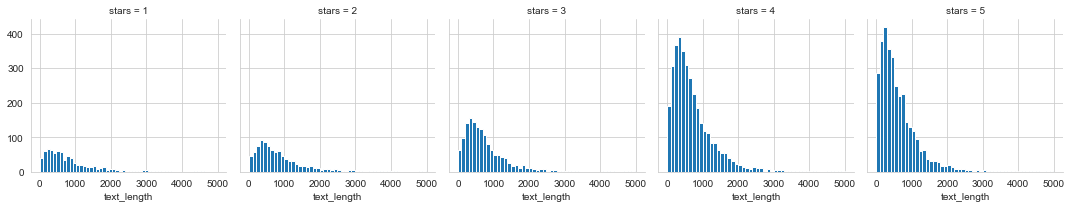

In [55]:
f = sns.FacetGrid(df, col='stars')
f.map(plt.hist, 'text_length', bins=50)

Seems the distribution for all stars are the same.

Create a boxplot of text length for each star category.

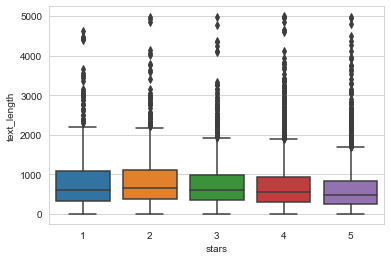

In [17]:
sns.boxplot(x='stars', y='text_length', data=df)

Create a countplot of the number of occurrences for each type of star rating.

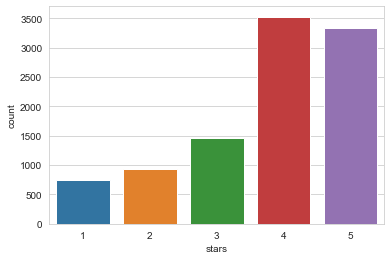

In [18]:
sns.countplot(df['stars'])

Use groupby to get the mean values of the numerical columns.

In [23]:
stars = df.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Use the corr() method on that groupby dataframe

In [26]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


Then use seaborn to create a heatmap based off that .corr() dataframe:

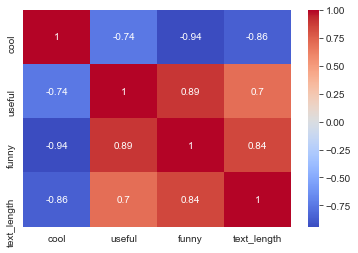

In [29]:
sns.heatmap(stars.corr(), annot=True, cmap='coolwarm')

## NLP Classification Task

To make things a little easier only grab reviews that were either 1 star or 5 stars.

In [37]:
df_class = df[(df['stars']==1) | (df['stars']==5)]

Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)

In [38]:
X = df_class['text']
y = df_class['stars']

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.

In [41]:
X = cv.fit_transform(X)

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

We will be using Naive Bayes classifier.

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

Now fit nb using the training data.

In [44]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [45]:
y_pred = nb.predict(X_test)

Create a confusion matrix and classification report using these predictions and y_test

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print('Confusion Matrix:\n', confusion_matrix(y_pred, y_test), '\n')
print('Classification Report:\n', classification_report(y_pred, y_test))

Confusion Matrix:
 [[159  22]
 [ 69 976]] 

Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.88      0.78       181
           5       0.98      0.93      0.96      1045

    accuracy                           0.93      1226
   macro avg       0.84      0.91      0.87      1226
weighted avg       0.94      0.93      0.93      1226



# Using Text Processing

Let's see what happens if we try to include TF-IDF to this process using a pipeline.

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()

In [50]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_class['text'], df_class['stars'],test_size=0.3,random_state=101)

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [53]:
y_pred_pipeline = pipeline.predict(X_test)

In [54]:
print('Confusion Matrix:\n', confusion_matrix(y_pred_pipeline, y_test), '\n')
print('Classification Report:\n', classification_report(y_pred_pipeline, y_test))

Confusion Matrix:
 [[  0   0]
 [228 998]] 

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.81      0.90      1226

    accuracy                           0.81      1226
   macro avg       0.50      0.41      0.45      1226
weighted avg       1.00      0.81      0.90      1226



C:\Users\salizadeh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with: